In [1]:
# Import necessary libraries
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install kaggle

In [11]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 99% 328M/330M [00:04<00:00, 25.6MB/s]
100% 330M/330M [00:04<00:00, 78.1MB/s]


In [13]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-12k-images-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [14]:
#all folders i have
!ls

 face-mask-12k-images-dataset.zip   kaggle.json
'Face Mask Dataset'		    sample_data


In [16]:
# Set the paths to your training and testing datasets
train_data_dir = '/content/Face Mask Dataset/Train'
test_data_dir = '/content/Face Mask Dataset/Test'
validation_data_dir='/content/Face Mask Dataset/Validation'

In [17]:
# Set the input image size
img_width, img_height = 128, 128



In [18]:
CATEGORIES = []
for i in os.listdir(train_data_dir):
  CATEGORIES.append(i)
print(CATEGORIES)

['WithMask', 'WithoutMask']


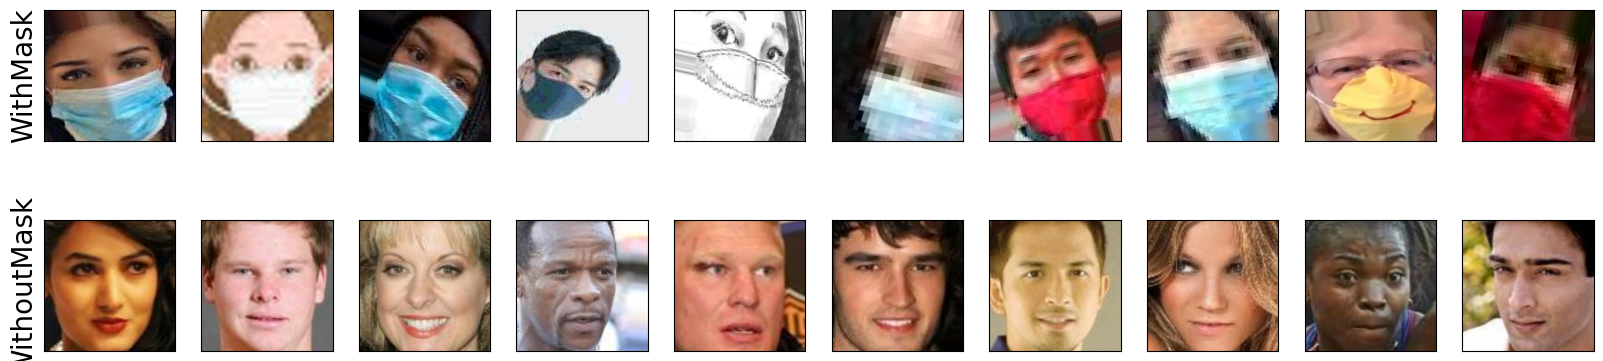

In [19]:
import matplotlib.pyplot as plt
import cv2
i = 0
plt.figure(figsize=(20,5))
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    plt.subplot(2,10,i+1)
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    # img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BRG2RGB)
    plt.imshow(img_arr)
    if i%10 ==0:
      plt.ylabel(c, size=20)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i%10 == 0:
      break

plt.show()

In [20]:
train_data = []
for c in CATEGORIES:
  path = os.path.join(train_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    train_data.append([img_arr, CATEGORIES.index(c)])
print(len(train_data))

10000


In [21]:
valid_data = []
for c in CATEGORIES:
  path = os.path.join(validation_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    valid_data.append([img_arr, CATEGORIES.index(c)])
print(len(valid_data))

800


In [22]:
test_data = []
for c in CATEGORIES:
  path = os.path.join(test_data_dir,c)
  for img in os.listdir(path):
    img_arr = plt.imread(os.path.join(path,img))
    img_arr = cv2.resize(img_arr, (227,227))
    test_data.append([img_arr, CATEGORIES.index(c)])
print(len(test_data))

992


In [23]:
# Set the batch size and number of epochs
batch_size = 32
epochs = 20


In [24]:

# Create the model
model = Sequential()


In [25]:
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [26]:
# Flatten the image pixels
model.add(Flatten())



In [27]:
# Add fully-connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))



In [28]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [29]:
# Preprocess the images and perform data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height),
                                                  batch_size=batch_size, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [30]:
# Train the model
h=model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs,
          validation_data=test_generator, validation_steps=test_generator.samples // batch_size)





Epoch 1/20
312/312 [==============================] - 444s 1s/step - loss: 0.1627 - accuracy: 0.9383 - val_loss: 0.1090 - val_accuracy: 0.9597
Epoch 2/20
312/312 [==============================] - 436s 1s/step - loss: 0.0741 - accuracy: 0.9742 - val_loss: 0.0658 - val_accuracy: 0.9819
Epoch 3/20
312/312 [==============================] - 432s 1s/step - loss: 0.0474 - accuracy: 0.9829 - val_loss: 0.0365 - val_accuracy: 0.9859
Epoch 4/20
312/312 [==============================] - 431s 1s/step - loss: 0.0347 - accuracy: 0.9871 - val_loss: 0.0210 - val_accuracy: 0.9919
Epoch 5/20
312/312 [==============================] - 426s 1s/step - loss: 0.0356 - accuracy: 0.9871 - val_loss: 0.0412 - val_accuracy: 0.9829
Epoch 6/20
312/312 [==============================] - 428s 1s/step - loss: 0.0308 - accuracy: 0.9893 - val_loss: 0.0265 - val_accuracy: 0.9899
Epoch 7/20
312/312 [==============================] - 428s 1s/step - loss: 0.0271 - accuracy: 0.9895 - val_loss: 0.0293 - val_accuracy: 0.9899

In [31]:
# Evaluate the model
scores = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Loss: %.2f" % scores[0])
print("Accuracy: %.2f%%" % (scores[1] * 100))


31/31 [==============================] - 12s 374ms/step - loss: 0.0260 - accuracy: 0.9899
Loss: 0.03
Accuracy: 98.99%


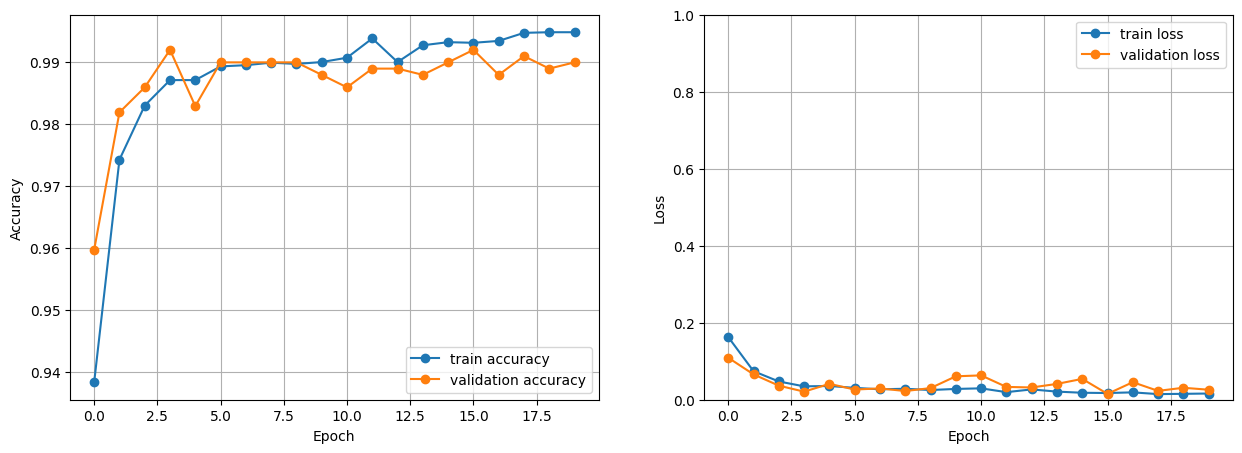

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [33]:
# Make predictions on new images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (img_width, img_height))
    img = np.reshape(img, [1, img_width, img_height, 3])
    img = img / 255.0

    prediction = model.predict(img)
    if prediction[0] < 0.5:
        return "With Mask"
    else:
        return "Without Mask"



In [34]:
# Test the model on new images
image_path = '/content/Face Mask Dataset/Test/WithMask/1163.png'
prediction = predict_image(image_path)
print("Prediction:", prediction)


1/1 [==============================] - 0s 165ms/step
Prediction: With Mask


In [35]:
# Test the model on new images
image_path = '/content/Face Mask Dataset/Test/WithoutMask/1000.png'
prediction = predict_image(image_path)
print("Prediction:", prediction)

1/1 [==============================] - 0s 36ms/step
Prediction: Without Mask


Path of the image to be predicted: /content/Face Mask Dataset/Test/WithMask/1361.png


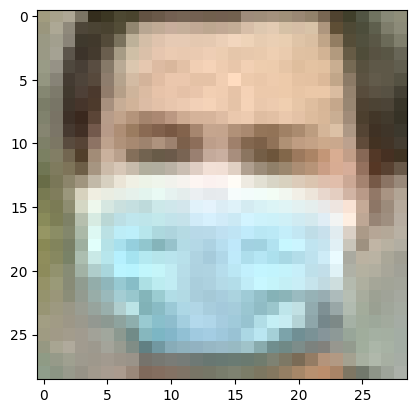

1/1 [==============================] - 0s 40ms/step
[[0.5177192]]
0
The person in the image is wearing a mask


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is not wearing a mask')
else:
  print('The person in the image is wearing a mask')
